In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os.path
import sys
import pandas
import re
import textgrid
import parselmouth
from parselmouth.praat import call
from IPython.display import HTML, display

In [3]:
# Parameters
labellings_dir="/recordings/references"
ignorar=[]
valid_phonemes=['a','m','n','l']

In [4]:
def extract_tiers(filename, fmt="yun"):
    tg= textgrid.TextGrid()
    tg.read(filename)
    if fmt=="yun":
        try:
            phonemes=tg[0]
            syllables=tg[1]
            words=tg[2]        
        except IndexError:
            print('Something wrong with {}'.format(fname))
        return {"phonemes":phonemes, "syllables":syllables, "words":words}
    elif fmt=="fer":
        try:
            phonemes=tg[0]        
        except IndexError:
            print('Something wrong with {}'.format(fname))
        return {"phonemes":phonemes}
        
def count_phonemes(stream,phonemes=['a'],context=["l",'r',"m","n"]):
    ws=[w.mark for w in stream if w and len(w.mark)>0]
    ws_=[]
    ws=zip(ws,ws[1:])
    for p0,p1 in ws:
        if p1 in phonemes:
            if p0 in context:
                ws_.append(p0)
        else:
            pass
    return ws_

def summary_count_phonemes(labellings,count):
    print('Total de grabaciones',len(labellings))
    print('Total de phonemas etiquetados',sum(list(count.values())))
    print('Total tipos de phonemas etiquetados',len(count))
    for k,v in phoneme_c.most_common():
        print("Fonema {}:".format(k),v)
        
re_main_name=re.compile(r'(?P<main>.*(FON|LEC|lec|lect|Texto))_.*')
re_main_name2=re.compile(r'(?P<main>.*ZOOM.*)_ma_na_la_ra.*')

def getwavfilename(tg_file,fmt="yun"):
    filename=None
    if fmt=="yun":
        m = re_main_name.match(tg_file)
        if m:
            filename=m.group('main').replace('_','.',1)+".wav"
            if not os.path.exists(filename):
                filename=m.group('main').replace('_','.',1)+".WAV"
        if not filename or not os.path.exists(filename):
            m = re_main_name2.match(tg_file)
            if m:
                filename=m.group('main').replace('_','.',1)+".wav"
                if not os.path.exists(filename):
                    filename=m.group('main').replace('_','.',1)+".WAV"
    elif fmt=="fer":
        filename=tg_file[:-8]+"WAV"
    return filename

# Labelings

In [5]:
labellings={}
# Navega todos los archivos
for dirName, subdirList, fileList in os.walk(labellings_dir):
    for fname in fileList:
        if fname.endswith('ma_na_la_ra.TextGrid'):
            if fname in ignorar:
                continue
            if getwavfilename(os.path.join(dirName,fname)):
                labellings[fname]=extract_tiers(os.path.join(dirName,fname))
                labellings[fname]['dirname']=os.path.join(dirName,fname)
                labellings[fname]['wavname']=getwavfilename(os.path.join(dirName,fname))
            else:
                print("Missing wav for",fname)

In [6]:
from collections import Counter
phoneme_c=Counter()
for f,info in labellings.items():
    phoneme_c.update(count_phonemes(info["phonemes"],context=["l","m","n"]))
    
summary_count_phonemes(labellings,phoneme_c)

Total de grabaciones 82
Total de phonemas etiquetados 1032
Total tipos de phonemas etiquetados 3
Fonema l: 400
Fonema m: 318
Fonema n: 314


# Cases

In [7]:
dir_indubitadas="/recordings/cases"
cases=[(["F1_LEC_3_09_2019.TextGrid","F1_LEC_14_11_2019.TextGrid"],["F1_LEC_3_09_2019.WAV","F1_LEC_14_11_2019.WAV"]),
      (["F1_LEC_3_09_2019.TextGrid","F3_LEC_12_11_2019.TextGrid"],["F1_LEC_3_09_2019.WAV","F3_LEC_12_11_2019.WAV"]),
      (["F3_LEC_13_09_2019.TextGrid","F3_LEC_12_11_2019.TextGrid"],["F3_LEC_13_09_2019.WAV","F3_LEC_12_11_2019.WAV"]),
      (["F1_LEC_3_09_2019.TextGrid","F4_LEC_08_11_2019.TextGrid"],["F1_LEC_3_09_2019.WAV","F4_LEC_08_11_2019.WAV"]),
      (["F4_LEC_13_09_2019.TextGrid","F3_LEC_12_11_2019.TextGrid"],["F4_LEC_13_09_2019.WAV","F3_LEC_12_11_2019.WAV"]),
       (["F4_LEC_13_09_2019.TextGrid","F4_LEC_08_11_2019.TextGrid"],["F4_LEC_13_09_2019.WAV","F4_LEC_08_11_2019.WAV"]),
      ]

In [8]:
casesinfo={}
for ii,(f_case,w_case) in enumerate(cases):
    print("===Case {0}===".format(ii+1))
    casesinfo[ii]={}
    # Navega todos los archivos
    for fname,wname in zip(f_case,w_case):
        casesinfo[ii][fname]=extract_tiers(os.path.join(dir_indubitadas,fname),fmt="fer")
        casesinfo[ii][fname]['wavname']=getwavfilename(os.path.join(dir_indubitadas,fname),fmt="fer")

    phoneme_c=Counter()
    for f,info in casesinfo[ii].items():
        phoneme_c.update(count_phonemes(info["phonemes"],phonemes=["na","la","ma"]))

    summary_count_phonemes(casesinfo[ii],phoneme_c)

===Case 1===
Total de grabaciones 2
Total de phonemas etiquetados 25
Total tipos de phonemas etiquetados 3
Fonema l: 12
Fonema n: 7
Fonema m: 6
===Case 2===
Total de grabaciones 2
Total de phonemas etiquetados 25
Total tipos de phonemas etiquetados 3
Fonema l: 12
Fonema n: 7
Fonema m: 6
===Case 3===
Total de grabaciones 2
Total de phonemas etiquetados 24
Total tipos de phonemas etiquetados 3
Fonema l: 10
Fonema n: 8
Fonema m: 6
===Case 4===
Total de grabaciones 2
Total de phonemas etiquetados 25
Total tipos de phonemas etiquetados 3
Fonema l: 12
Fonema n: 7
Fonema m: 6
===Case 5===
Total de grabaciones 2
Total de phonemas etiquetados 23
Total tipos de phonemas etiquetados 3
Fonema l: 10
Fonema n: 7
Fonema m: 6
===Case 6===
Total de grabaciones 2
Total de phonemas etiquetados 23
Total tipos de phonemas etiquetados 3
Fonema l: 10
Fonema n: 7
Fonema m: 6


# extracting data

In [9]:
re_key=re.compile(r"(?P<NUM>\d+).(?P<STATE>...)(?P<STUDIES>N\d)(?P<AGE>E\d)S?(?P<GENDER>.)\d\d\d.*")
re_key_fer=re.compile(r"(?P<GENDER>\w)(?P<NUM>\d).*")


def get_series_from_files(fname,info,nformants=5,case=0,extract_info=None,phonemes=['a'],context=["m","n","l"],fmt="yun"):
    snd = parselmouth.Sound(info['wavname'])
    formants = snd.to_formant_burg()
    pitch = snd.to_pitch()
    ninter=0
    series=[]
    prev=None
    name_info={"NUM":None,"STATE":None,"STUDIES":None,"AGE":None,"GENDER":None}
    print(fname)
    if extract_info:
        if fmt=="yun":
            m=re_key.match(fname)
            if m:
                name_info=m.groupdict()
        elif fmt=="fer":
            m=re_key_fer.match(fname)
            if m:
                name_info.update(m.groupdict())
    for interval in info['phonemes']:
        mark=interval.mark.strip()
        if len(mark)==0:
            continue
            
        #if mark[-1] == "s":
        #    mark=mark[:-1]
        
        if (not mark in phonemes) or (not prev in context):
            prev=mark
            continue
        
        ini=float(interval.minTime)
        fin=float(interval.maxTime)
        
        ini_=int(formants.get_frame_number_from_time(ini))
        fin_=int(formants.get_frame_number_from_time(fin))

        F0s=[]
        Fs=[[] for i in range(nformants)]
        for frame in range(ini_,fin_):
            t=formants.get_time_from_frame_number(frame)
            F0=pitch.get_value_at_time(float(t))
            F0s.append(F0 if not np.isnan(F0) else 0.0)
            
            for i in range(nformants):
                Fs[i].append(formants.get_value_at_time(i+1,float(t)))
        
        if fmt=="yun":
            phoneme="{0}{1}".format(prev,mark)
        else:
            phoneme=mark
        series.append(pandas.Series([
            case,fname,info['wavname'],name_info['STATE'],name_info['GENDER'],name_info['AGE'],name_info['STUDIES'],name_info['NUM'],'F0',ninter,ini,fin,prev,mark,phoneme,F0s],index=data.columns))
        for i in range(nformants):
            series.append(pandas.Series([
                case,fname,info['wavname'],name_info['STATE'],name_info['GENDER'],name_info['AGE'],name_info['STUDIES'],name_info['NUM'],'F{}'.format(i+1),ninter,ini,fin,prev,mark,phoneme,Fs[i]],index=data.columns))
        
        prev=mark
        ninter+=1
    return series

series=[]
data = pandas.DataFrame(columns = ['case','fname','wname','state','gender','age group','studies group','num','measure','interval','ini','fin','c','v','cv','vals']) 

for ifile,(fname,info) in list(enumerate(labellings.items())):
    print("Processing",ifile+1,fname)
    print("Opening",info['wavname'])
    series.extend(get_series_from_files(fname,info,case=0,extract_info=True,context=["m","l","n"]))

for ii, case in enumerate(casesinfo):
    for ifile,(fname,info) in list(enumerate(casesinfo[ii].items())):
        print("Processing",ifile+1,fname)
        print("Opening",info['wavname'])
        series.extend(get_series_from_files(fname,info,case=case+1,extract_info=True,fmt="fer",phonemes=["la","ma","na"],context=["m","l","n"]))

data=data.append(series,ignore_index=True)

Processing 1 7_CDMN2E1SM005_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/7.CDMN2E1SM005_LEC.wav
7_CDMN2E1SM005_LEC_ma_na_la_ra.TextGrid
Processing 2 20_CDMN3E1SF003_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/20.CDMN3E1SF003_LEC.wav
20_CDMN3E1SF003_LEC_ma_na_la_ra.TextGrid
Processing 3 71_MEXN3E1SM003_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/71.MEXN3E1SM003_LEC.wav
71_MEXN3E1SM003_LEC_ma_na_la_ra.TextGrid
Processing 4 65_MEXN3E1SF001_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/65.MEXN3E1SF001_LEC.wav
65_MEXN3E1SF001_LEC_ma_na_la_ra.TextGrid
Processing 5 16_CDMN2E3SF001_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/16.CDMN2E3SF001_LEC.WAV
16_CDMN2E3SF001_LEC_ma_na_la_ra.TextGrid
Processing 6 25_CDMN3E1SF008_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/25.CDMN3E1SF008_LEC.wav
25_CDMN3E1SF008_LEC_ma_na_la_ra.TextGrid
Processing 7 83_ZOOM0003lect_ma_na_la_ra.TextGrid
Opening /recordings/references/83.ZOOM0003lect.WAV
83

32_CDMN3E1SF016_LEC_ma_na_la_ra.TextGrid
Processing 57 14_CDMN2E2SM001_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/14.CDMN2E2SM001_LEC.wav
14_CDMN2E2SM001_LEC_ma_na_la_ra.TextGrid
Processing 58 45_CDMN3E1SM014_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/45.CDMN3E1SM014_LEC.wav
45_CDMN3E1SM014_LEC_ma_na_la_ra.TextGrid
Processing 59 63_CMN3E1SM016_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/63.CMN3E1SM016_LEC.wav
63_CMN3E1SM016_LEC_ma_na_la_ra.TextGrid
Processing 60 11_CDMN2E2SF002_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/11.CDMN2E2SF002_LEC.WAV
11_CDMN2E2SF002_LEC_ma_na_la_ra.TextGrid
Processing 61 55_CDMN3E2SF006_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/55.CDMN3E2SF006_LEC.wav
55_CDMN3E2SF006_LEC_ma_na_la_ra.TextGrid
Processing 62 51_CDMN3E2SF002_LEC_ma_na_la_ra.TextGrid
Opening /recordings/references/51.CDMN3E2SF002_LEC.wav
51_CDMN3E2SF002_LEC_ma_na_la_ra.TextGrid
Processing 63 24_CDMN3E1SF007_LEC_ma_na_la_ra.TextGrid
O

In [10]:
data.to_pickle("labellings.pkl")

# Loading data

In [11]:
data=pandas.read_pickle("labellings.pkl")
print("Metrics",",".join(data.measure.unique()))
print("Contextos",",".join(data.cv.unique()))
print("Total de casos",len(data.case.unique()))

Metrics F0,F1,F2,F3,F4,F5
Contextos la,ma,na
Total de casos 7


# Visualizing data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import normalize
from scipy import interpolate

In [15]:
def stretch_matrix(vals):
    maxlen=max([len(x) for x in vals])
    sums=[sum(x) for x in vals ]
    mat=np.zeros((len(vals),maxlen))
    for ival,val in enumerate(vals):
        val=[x for x in val if not numpy.isnan(x)]
        interpol = interpolate.interp1d(np.arange(len(val)),val)
        stretch = interpol(np.linspace(0,len(val)-1,maxlen))
        mat[ival,:]=stretch
    return mat

def graph_user(values,name,measures_order=['F0','F1','F2','F3'],cv_order=["la","na","ma","ra","todos"],filename=None,title="Case {} Recording {}"):
    plt.figure()
    measures=values[[_ for _ in values.keys()][0]]
    fig, axs = plt.subplots(len(measures_order),len(values))
    fig.set_size_inches(3.5*len(cv_order),2.5*len(measures), forward=True)
    #fig.suptitle('{}'.format(name))
    #if not case==0:
    #    plt.suptitle(title.format(case,name))
    
    min_max={}
    for icv,cv in enumerate(cv_order):
        for imeasure,measure in enumerate(measures_order):
            data=values[cv][measure]
            try:
                min_,max_=min_max[measure]
                min_ = np.min(data) if np.min(data) < min_ else min_
                max_ = np.max(data) if np.max(data) > max_ else max_
            except KeyError:
                min_ = np.min(data) 
                max_ = np.max(data)
            min_max[measure]=(min_,max_)

    for icv,cv in enumerate(cv_order):
        for imeasure,measure in enumerate(measures_order):
            ax=axs[len(measures_order)-imeasure-1,icv]
            data=values[cv][measure]
            mu = data.mean(axis=0)
            sigma = data.std(axis=0)
            ax.set_ylim(min_max[measure][0],min_max[measure][1])
            ax.fill_between(np.arange(len(mu)), mu+sigma, mu-sigma, facecolor='yellow', alpha=0.5)
            ax.plot(mu)
            ax.plot(data.T,color='grey', linestyle='dashed', alpha=0.5)
    
            if len(measures_order)-imeasure-1==0:
                ax.set_title(cv)
            if icv==0:
                ax.set_ylabel(measure)
            #ax.annotate(str(len(data)), xy=(1, 0), xycoords='axes fraction', fontsize=12,
            #    horizontalalignment='right', verticalalignment='bottom',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})
    
    if filename:
        _=plt.savefig(filename)
        plt.close(fig)
    else:
        plt.show()

def plot_case(data,case,cvs=['la','ma','na','ra'],measures=['F0','F1','F2','F3'],title="Case {} Recording {}"):
    population=data['case']==case
    for spk in data[population].fname.unique():
        values={}
        values['todos']={}
        for cv in cvs:
            values[cv]={}
            for measure in measures:
                tbl=data.loc[(data['case']==case) & (data['fname']==spk) & (data['cv']==cv) & (data['measure']==measure)]
                if len(tbl.vals)>0:
                    values[cv][measure]=stretch_matrix(tbl.vals)
        for measure in measures:
            tbl=data.loc[(data['case']==case) & (data['fname']==spk) & (data['measure']==measure)]
            values['todos'][measure]=stretch_matrix(tbl.vals)
        name,ext=spk.rsplit(".",1)
        graph_user(values,name,filename="{}.jpg".format(name),cv_order=cvs,title=title)

In [16]:
plot_case(data,0, cvs=["la","ma","na","todos"])

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
for ii,case in enumerate(cases):
    print("==== Case {} ====".format(ii))
    plot_case(data,ii+1,cvs=["la","ma","na","todos"])

==== Case 0 ====
==== Case 1 ====
==== Case 2 ====
==== Case 3 ====
==== Case 4 ====
==== Case 5 ====


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Comparasión

In [18]:
def recover_values(data,cv,measure,case=0,metric="mean",recording=None,extra={}, filter_outliers=True, m=2):
    population=data['case']==case
    values=[]
    if not recording:
        recordings=data[population].fname.unique()
    else:
        recordings=[x for ix,x in enumerate(data[population].fname.unique()) if ix in recording]
    query = ' & '.join(['{}=="{}"'.format(k, v) for k, v in extra.items()])
    for spk in recordings:
        if cv=="todos":
            tbl=data.loc[(data['case']==case) & (data['fname']==spk) & (data['measure']==measure)]
        else:
            tbl=data.loc[(data['case']==case) & (data['fname']==spk) & (data['cv']==cv) & (data['measure']==measure)]
        if len(extra):
            tbl=tbl.query(query)
        for vals in tbl.vals:
            if metric=="mean":
                values.append(np.mean(vals))
            if metric=="maxmin":
                max_=np.max(vals)
                min_=np.min(vals)
                values.append(max_-min_)
            if metric=="max":
                values.append(np.max(vals))
            if metric=="min":
                values.append(np.mean(vals))
            if metric=="middle_point":
                mp=int(len(vals)/2)
                values.append(vals[mp])
        if metric=="length":
            for val in (tbl.fin-tbl.ini):
                values.append(val)
            
    data=np.array(values)
    if filter_outliers:
        return data[abs(data - np.mean(data)) < m * np.std(data)]
    else:
        return data

def plot_histograms(data,case,extra={},cvs=['la','ma','na','ra',"todos"],measures=['F0','F1','F2','F3'],metric="mean",title="Histograma",nbins=80,recording=None,filename=None,titles={"todos":"all"}):
    plt.style.use('seaborn-darkgrid')
    plt.figure()
    fig, axs = plt.subplots(len(measures),len(cvs))
    fig.set_size_inches(3.5*len(cvs),2.5*len(measures), forward=True)
    fig.suptitle(title)

    for icv,cv in enumerate(cvs):
        for imeasure,measure in enumerate(measures):
            if len(measures)==1:
                ax=axs[icv]
            else:
                ax=axs[len(measures)-imeasure-1,icv]
            
            means_population=recover_values(data,cv,measure,case=case,metric=metric,recording=recording,extra=extra)
            ax.hist(means_population,bins=nbins)
            if len(measures)-imeasure-1==0:
                ax.set_title("{} [{}]".format(titles.get(cv,cv),len(means_population)))
            if icv==0:
                ax.set_ylabel(measure)
            #ax.annotate(str(), xy=(1, 1), xycoords='axes fraction', fontsize=8,
            #    horizontalalignment='right', verticalalignment='top',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 2})
    if filename:
        _=plt.savefig(filename)
        plt.close(fig)
    else:
        plt.show()
            


In [19]:
# promedio
plot_histograms(data,0,title="",extra={"gender":'F'},metric="mean",cvs=['la','ma','na',"todos"],filename="histogram_female.png")
plot_histograms(data,0,title="",extra={"gender":'M'},metric="mean",cvs=['la','ma','na',"todos"],filename="histogram_male.png")
#plot_histograms(data,0,title="Histograma población (promedio)",metric="mean")

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

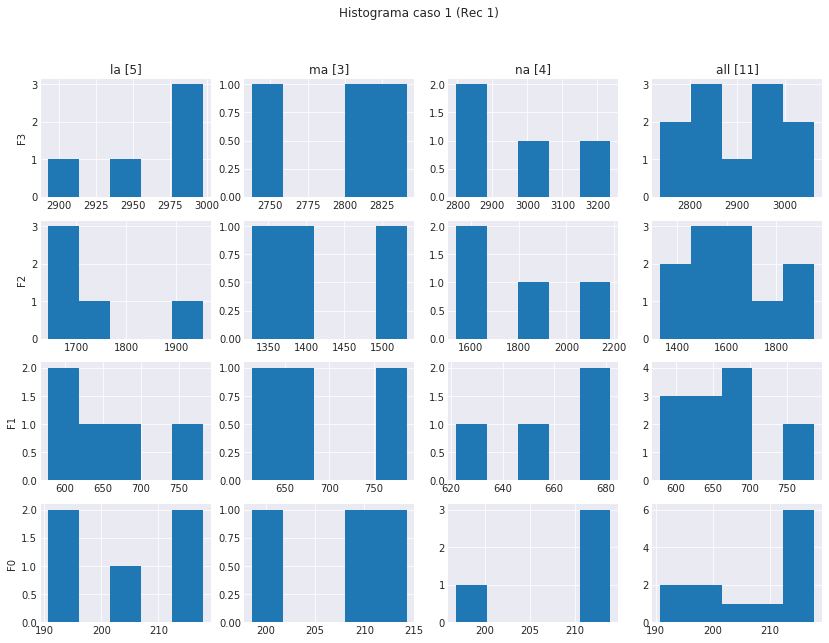

<Figure size 432x288 with 0 Axes>

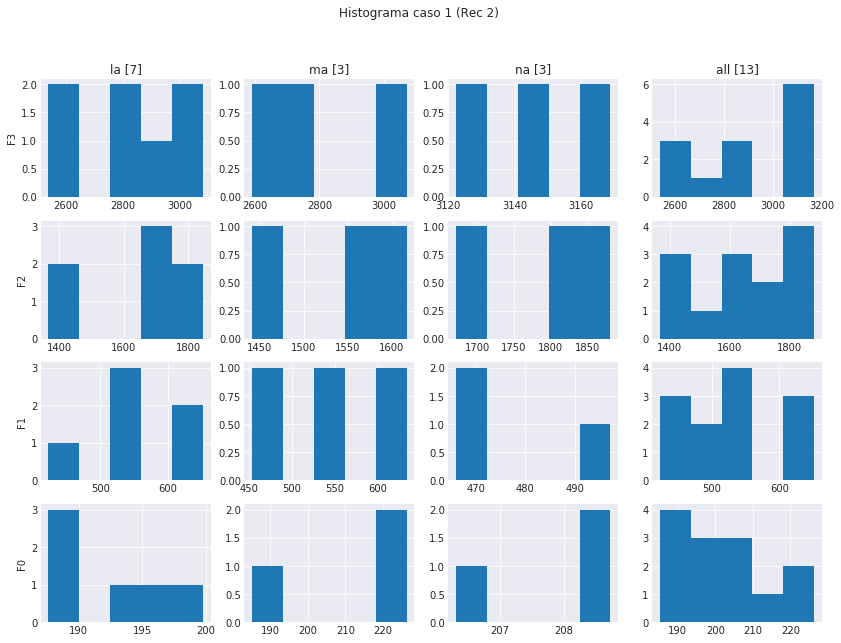

<Figure size 432x288 with 0 Axes>

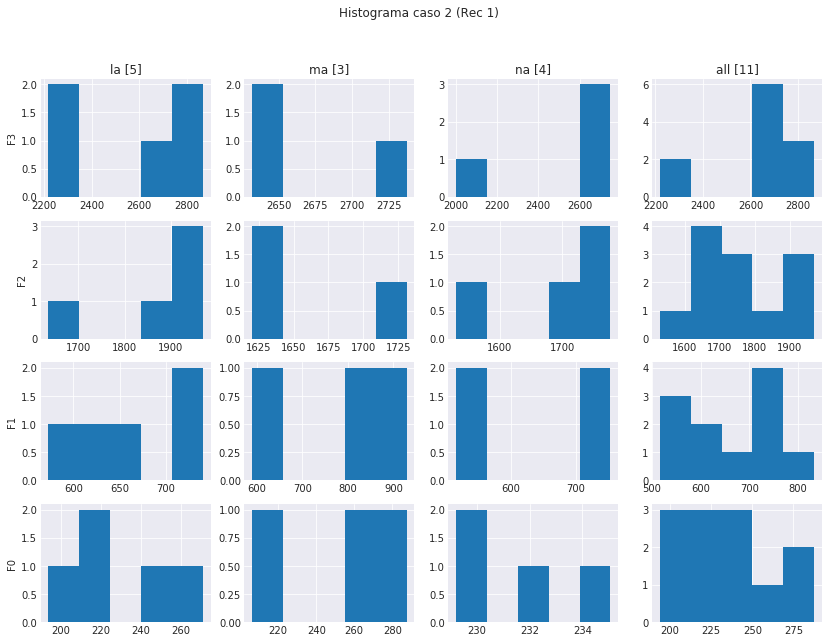

<Figure size 432x288 with 0 Axes>

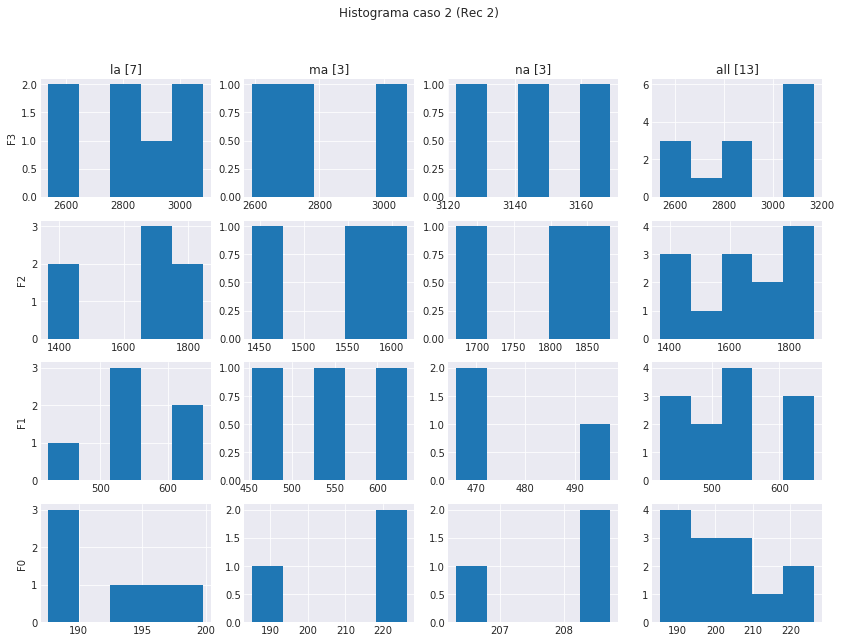

<Figure size 432x288 with 0 Axes>

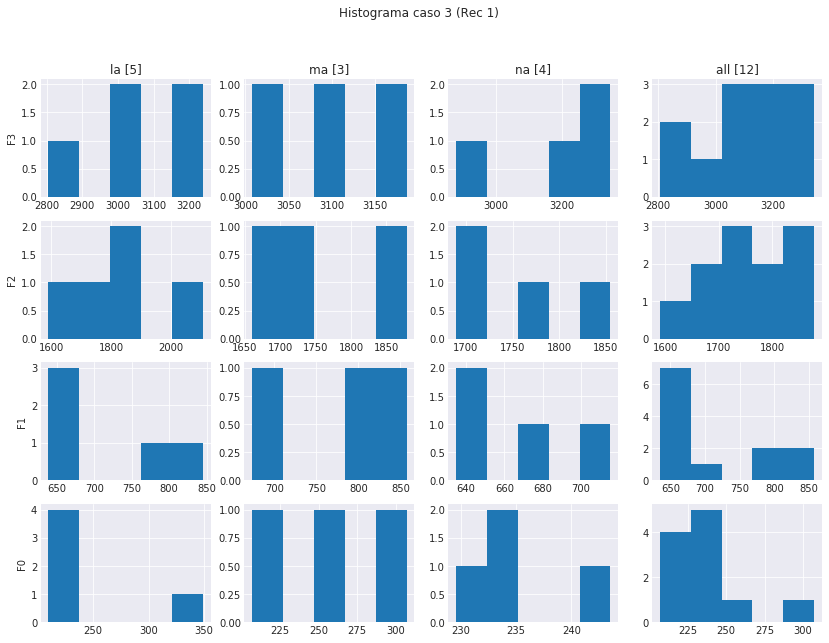

<Figure size 432x288 with 0 Axes>

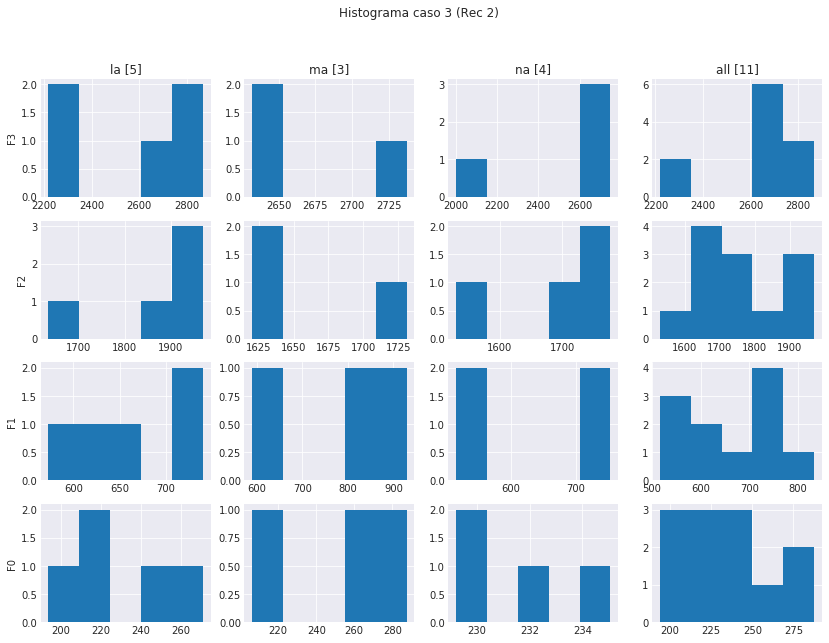

<Figure size 432x288 with 0 Axes>

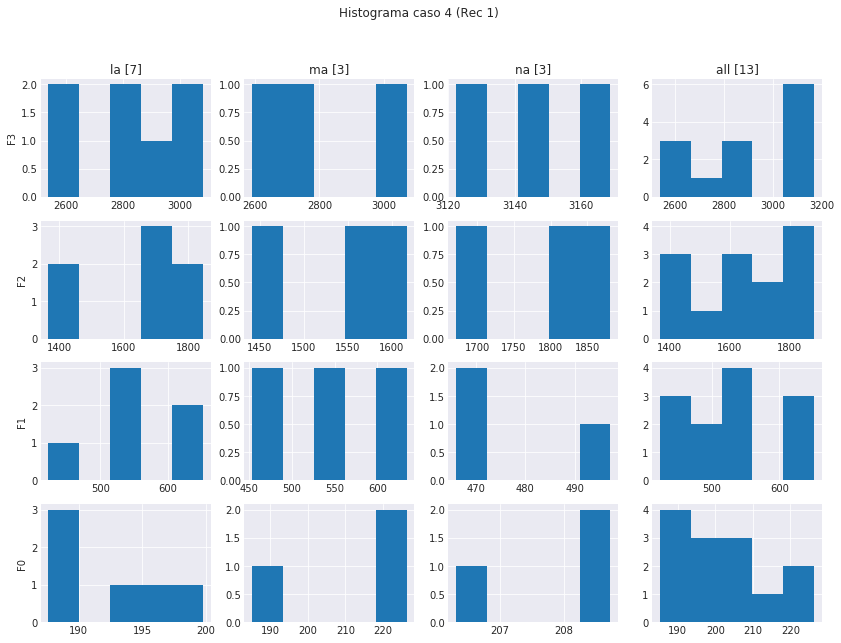

<Figure size 432x288 with 0 Axes>

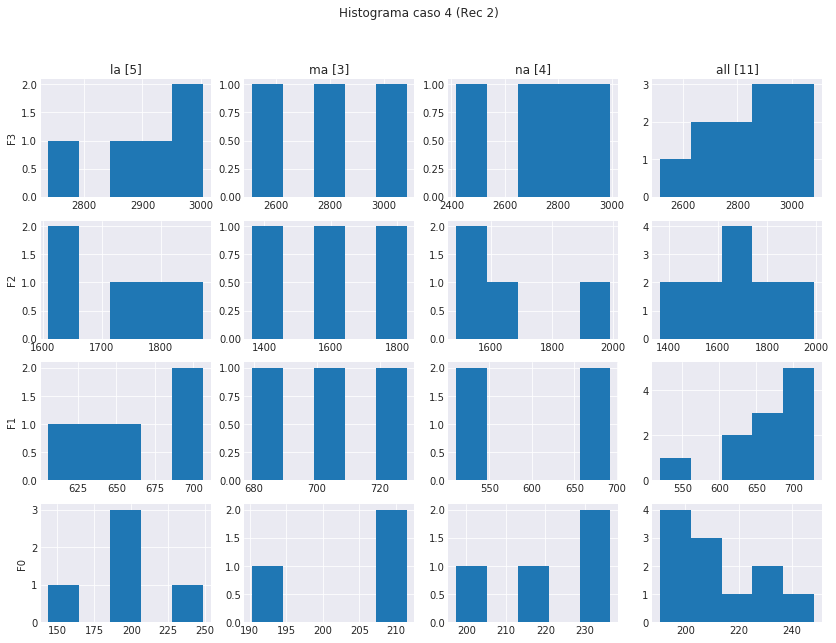

<Figure size 432x288 with 0 Axes>

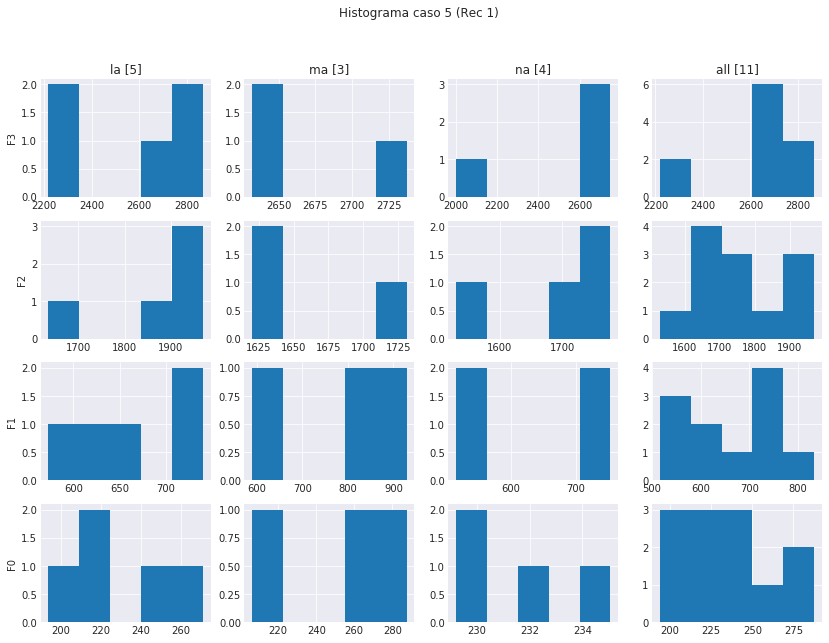

<Figure size 432x288 with 0 Axes>

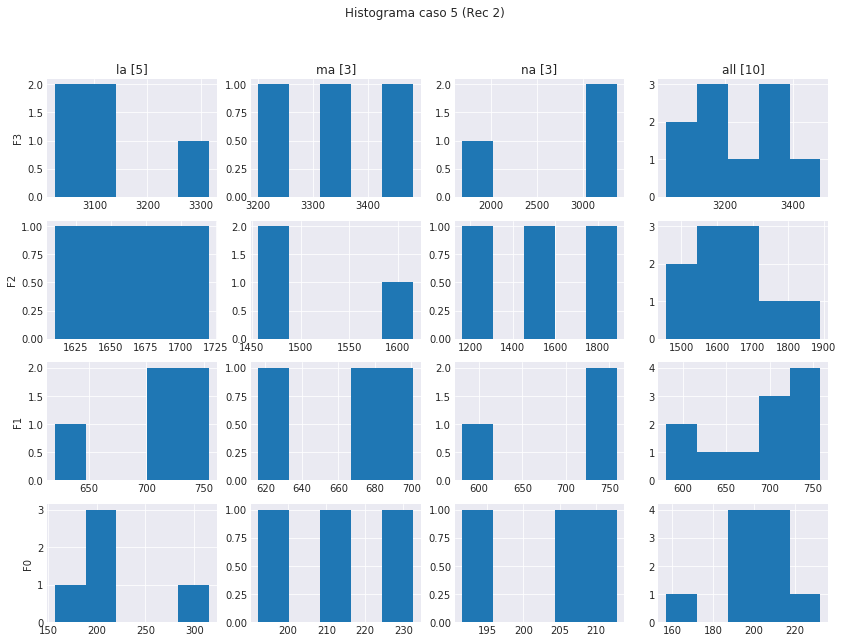

<Figure size 432x288 with 0 Axes>

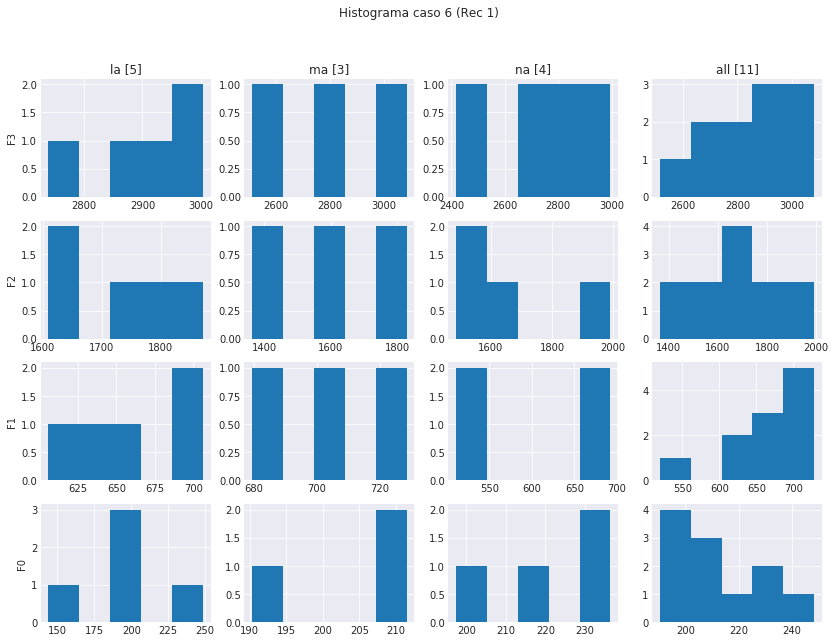

<Figure size 432x288 with 0 Axes>

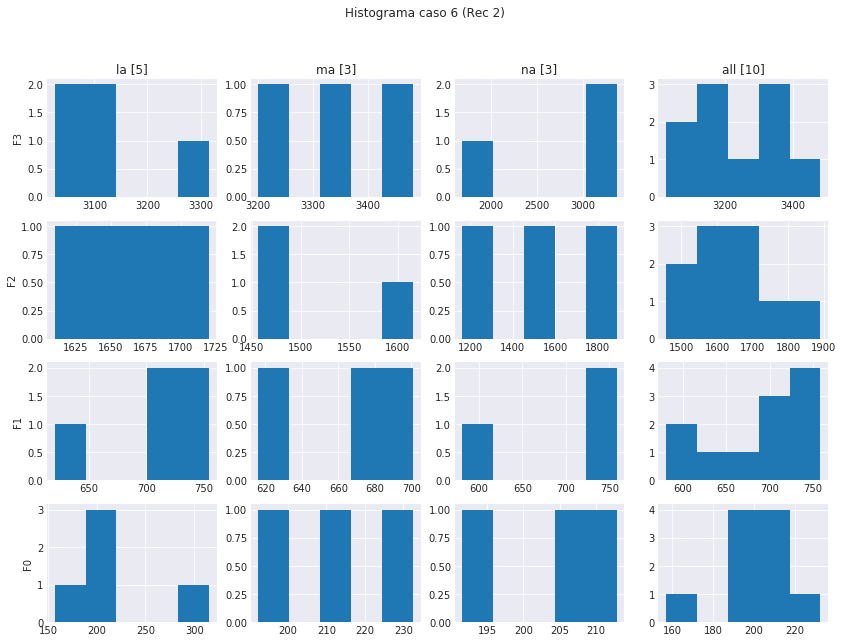

In [20]:
for ii,case in enumerate(cases):
    plot_histograms(data,ii+1,title="Histograma caso {} (Rec 1)".format(ii+1),nbins=5,recording=[0],cvs=['la','ma','na',"todos"])
    plot_histograms(data,ii+1,title="Histograma caso {} (Rec 2)".format(ii+1),nbins=5,recording=[1],cvs=['la','ma','na',"todos"])

In [21]:
metric="middle_point"
measure="F0"
means_population_F=recover_values(data,"la",measure,extra={"gender":"M"},metric=metric)
print("Mean population      :",np.mean(means_population_F))
print("Std dev population     :",np.std(means_population_F))

for ii,case in enumerate(cases):
    print("==== Case {} ====".format(ii+1))
    means_c1_r1=recover_values(data,"todos",measure,case=ii+1,recording=[0],filter_outliers=False,metric=metric)
    print("Mean F0 recording 1 :".format(ii+1),np.mean(means_c1_r1))
    print("Std dev F0 rec. 1   :",np.std(means_c1_r1))
    means_c1_r1=recover_values(data,"todos",measure,case=ii+1,recording=[1],filter_outliers=False,metric=metric)
    print("Mean F0 recording 2 :".format(ii+1),np.mean(means_c1_r1))
    print("Std dev F0 1 rec. 2   :",np.std(means_c1_r1))

Mean population      : 122.35910663323104
Std dev population     : 21.113994531414093
==== Case 1 ====
Mean F0 recording 1 : 206.28799854798376
Std dev F0 rec. 1   : 9.07429769719329
Mean F0 recording 2 : 202.8421801322243
Std dev F0 1 rec. 2   : 13.054629613990397
==== Case 2 ====
Mean F0 recording 1 : 232.6482557418889
Std dev F0 rec. 1   : 26.10115536932625
Mean F0 recording 2 : 202.8421801322243
Std dev F0 1 rec. 2   : 13.054629613990397
==== Case 3 ====
Mean F0 recording 1 : 243.61500693423235
Std dev F0 rec. 1   : 42.83913368720312
Mean F0 recording 2 : 232.6482557418889
Std dev F0 1 rec. 2   : 26.10115536932625
==== Case 4 ====
Mean F0 recording 1 : 202.8421801322243
Std dev F0 rec. 1   : 13.054629613990397
Mean F0 recording 2 : 211.31346190637578
Std dev F0 1 rec. 2   : 17.269197599895524
==== Case 5 ====
Mean F0 recording 1 : 232.6482557418889
Std dev F0 rec. 1   : 26.10115536932625
Mean F0 recording 2 : 213.2676610232905
Std dev F0 1 rec. 2   : 34.310843789768434
==== Case 6 

In [22]:
def res_plot(data,case=1,extra={},cvs=['la','ma','na','ra',"todos"],measures=['F0','F1','F2','F3'],bar_width=0.2,metric='mean'):
    c_res={}
    for icv,cv in enumerate(cvs):
        c_res[cv]={}
        for imeasure,measure in enumerate(measures):
            population=recover_values(data,cv,measure,extra=extra,metric=metric)
            c1_r1=recover_values(data,cv,measure,case=case,recording=[0],filter_outliers=False,metric=metric)
            c1_r2=recover_values(data,cv,measure,case=case,recording=[1],filter_outliers=False,metric=metric)
            res=phillip_rose_2002(c1_r1,c1_r2,population)
            c_res[cv][measure]=res['LR']
        
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10, forward=True)
    index=np.array(range(len(c_res[cv])))
    for icv,cv in enumerate(cvs):
        rects1 = plt.bar(index+icv*bar_width, [c_res[cv][m] for m in measures],bar_width*0.9,label=cv)
    ax.set_ylabel('LR')
    ax.set_title('LRs caso {} usando {}'.format(case,metric))
    plt.xticks(index + 2*bar_width, measures)
    ax.legend()
    plt.tight_layout()
    plt.show()
    
def res_table(data,case=1,extra={},cvs=['la','ma','na','ra',"todos"],measures=['F0','F1','F2','F3'],bar_width=0.2,metric='mean'):
    c_res={}
    for icv,cv in enumerate(cvs):
        c_res[cv]={}
        for imeasure,measure in enumerate(measures):
            population=recover_values(data,cv,measure,extra=extra,metric=metric)
            c1_r1=recover_values(data,cv,measure,case=case,recording=[0],filter_outliers=False,metric=metric)
            c1_r2=recover_values(data,cv,measure,case=case,recording=[1],filter_outliers=False,metric=metric)
            res=phillip_rose_2002(c1_r1,c1_r2,population)
            c_res[cv][measure]=res
    
    table="<table><tr><td></td>"
    for imeasures,measure in enumerate(measures):
        table+="<td><strong>{}</strong></td>".format(measure)
    table+="<td><strong>LR Acc</strong></td></tr>"

    LR_measure=dict([(measure,1.0) for measure in measures])
    for icv,cv in enumerate(cvs):
        table+="<tr>"
        table+="<td><strong>{}</strong></td>".format(cv)
        LR_cv=1.0
        for imeasure,measure in enumerate(measures):
            table+="<td>Sim:{similarity:.3f}</br>Tip:{tipicality:.3f}</br>LR:{LR:.3f}</br></td>".format(**c_res[cv][measure])
            LR_cv*=c_res[cv][measure]['LR']
            LR_measure[measure]*=c_res[cv][measure]['LR']
        table+="<td>{:.3f}</td></tr>".format(LR_cv)
    
    table+="<tr><td><strong>LR Acc</strong></td>".format(measure)
    LR_total=1.0
    for imeasures,measure in enumerate(measures):
        table+="<td>{:.3f}</td>".format(LR_measure[measure])
        LR_total*=LR_measure[measure]
    table+="<td>{:.3f}</td></tr>".format(LR_total)
    table+="</table>"
    return display(HTML(table))
    


In [23]:
def recover_groups(data,cv,case=0,measures=['F0','F1','F2','F3'],metric="mean",recording=None,extra={}, m=2):
    population=data['case']==case
    values=[]
    if not recording:
        recordings=data[population].fname.unique()
    else:
        recordings=[x for ix,x in enumerate(data[population].fname.unique()) if ix in recording]
    
    for spk in recordings:
        if cv=="todos":
            tbl_=data.loc[(data['case']==case) & (data['fname']==spk)]
        else:
            tbl_=data.loc[(data['case']==case) & (data['fname']==spk) & (data['cv']==cv)]
        
        values.append([])
        fst=True
        for imeasure,measure in enumerate(measures):
            extra['measure']=measure
            query = ' & '.join(['{}=="{}"'.format(k, v) for k, v in extra.items()])
            tbl=tbl_.query(query)
            
            for itbl,vals in enumerate(tbl.vals):
                if fst:
                    values[-1].append(np.zeros((len(measures),1)))
                if metric=="mean":
                    values[-1][itbl][imeasure,0]=np.mean(vals)
                if metric=="maxmin_rel":
                    max_=np.max(vals)
                    min_=np.min(vals)
                    values[-1][itbl][imeasure,0]=max_-min_
                if metric=="maxmin_abs":
                    max_=np.max(vals)
                    min_=np.min(vals)
                    values[-1][itbl][imeasure,0]=(max_+min_)/2
                if metric=="max":
                    values[-1][itbl][imeasure,0]=np.max(vals)
                if metric=="min":
                    values[-1][itbl][imeasure,0]=np.min(vals)
                if metric=="middle_point":
                    mp=int(len(vals)/2)
                    values[-1][itbl][imeasure,0]=vals[mp]
            if metric=="length":
                for val in (tbl.fin-tbl.ini):
                    values[-1][itbl][imeasure,0]=val
            fst=False
        if(len(values[-1])==0):
            values.pop()
    return values


In [24]:
def morrison_2011(r1,r2,population,p=4):
    res={}
    r1=r1[0]
    r2=r2[0]
    res['m']=len(population)
    res['ni']=[len(p) for p in population]
    res['_xi']=[np.sum(p,axis=0)/ni for p,ni in zip(population,res['ni'])]
    res['_x']=np.sum(res['_xi'],axis=0)/res['m']
    res['nl']=[len(p) for p in [r1,r2]]
    res['_yl']=[np.sum(p,axis=0)/ni for p,ni in zip([r1,r2],res['nl'])]
    U_num=0.0
    U_den=0.0
    for i in range(res['m']):    
        for j in range(res['ni'][i]):
            U_num+=np.matmul(population[i][j]-res['_xi'][i],(population[i][j]-res['_xi'][i]).T)
    U_den+=np.sum(res['ni'])-res['m']
    res['U']=U_num/U_den
    res['D']=[res['U']/res['nl'][l] for l in range(len([r1,r2]))]
    D_=[np.linalg.inv(d) for d in res['D']]
    res['y*']=np.matmul(np.linalg.inv(D_[0]+D_[1]),(np.matmul(D_[0],res['_yl'][0])+np.matmul(D_[1],res['_yl'][1])))
    C_1_num=0.0
    C_1_den=res['m']-1
    C_2_num=0.0
    C_2_den=0.0
    for i in range(res['m']):
        C_1_num+=np.matmul(res['_xi'][i]-res['_x'],(res['_xi'][i]-res['_x']).T)
        for j in range(res['ni'][i]):
            C_2_num+=np.matmul(population[i][j]-res['_xi'][i],(population[i][j]-res['_xi'][i]).T)
        C_2_den+=res['ni'][i]*(res['ni'][i]-1)
    res['C']=(C_1_num/C_1_den)-(C_2_num/C_2_den)
    res['h']=(4/(2*p+1))**(1/(p+4))*(res['m']**(-1/(p+4)))
    h2C=res['h']**2*res['C']
    _h2C=np.linalg.inv(h2C)
    
    LR_fac=(2*np.pi)**(-p)
    LR_fac*=np.linalg.det(res['D'][0])**(-0.5)
    LR_fac*=np.linalg.det(res['D'][1])**(-0.5)
    LR_fac*=np.abs(np.linalg.det(res['C']))**(-0.5)
    LR_fac*=(res['m']*res['h']**p)**(-1)
    LR_fac*=np.abs(np.linalg.det(D_[0]+D_[1]+_h2C))**(-0.5)
    LR_ex1=matmul(-0.5*(res['_yl'][0]-res['_yl'][1]).T,np.linalg.inv(res['D'][0]+res['D'][1]))
    LR_ex1=matmul(LR_ex1,res['_yl'][0]-res['_yl'][1])
    LR_ex1=np.exp(LR_ex1)
    
    LR_ex2=0.0
    for i in range(res['m']):
        LR_ex2_=matmul(-0.5*(res['y*']-res['_xi'][i]).T,np.linalg.inv(np.linalg.inv(D_[0]+D_[1])+h2C))
        LR_ex2_=matmul(LR_ex2_,res['y*']-res['_xi'][i])
        LR_ex2+=np.exp(LR_ex2_)
    LR_num=LR_fac*LR_ex1*LR_ex2
        
    LR_fac2=(2*np.pi)**(-p)
    LR_fac2*=np.abs(np.linalg.det(res['C']))**(-1)
    LR_fac2*=(res['m']*(res['h']**p))**(-2)
    LR_mul=1.0
    for l in range(len([r1,r2])):
        LR_mul_=np.linalg.det(res['D'][l])**(-0.5)
        LR_mul_*=np.abs(np.linalg.det(D_[l]+_h2C))**(-0.5)
        LR_ex3=0.0
        for i in range(res['m']):
            LR_ex3_=matmul(-0.5*(res['_yl'][l]-res['_xi'][i]).T,np.linalg.inv(res['D'][l]+h2C))
            LR_ex3_=matmul(LR_ex3_,res['_yl'][l]-res['_xi'][i])
            LR_ex3+=np.exp(LR_ex3_)
        LR_mul*=LR_mul_*LR_ex3

    LR_den=LR_fac2*LR_mul
    
    res['LR']=(LR_num/LR_den)[0,0]
    
    return res

In [25]:
means_groups_F=recover_groups(data,"todos",measures=['F0','F1','F2','F3'],extra={"gender":"F"})
means_c1_r1=recover_groups(data,"todos",measures=['F0','F1','F2','F3'],case=6,recording=[0])
means_c1_r2=recover_groups(data,"todos",measures=['F0','F1','F2','F3'],case=6,recording=[1])
res=morrison_2011(means_c1_r1,means_c1_r2,means_groups_F)
res['LR']

0.017100124761295847

In [26]:
def res_plot2(data,case=1,extra={},cvs=['la','ma','na','ra',"todos"],measures=['F0','F1','F2','F3'],bar_width=0.2,metric='mean'):
    c_res={}
    for icv,cv in enumerate(cvs):
        population=recover_groups(data,cv,measures=measures,extra=extra,metric=metric,case=0)
        c1_r1=recover_groups(data,cv,measures=measures,case=case,recording=[0],metric=metric)
        c1_r2=recover_groups(data,cv,measures=measures,case=case,recording=[1],metric=metric)
        res=morrison_2011(c1_r1,c1_r2,population)
        #print(res['LR'])
        c_res[cv]=res['LR']
        
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10, forward=True)
    #fig.suptitle("Case {}".format(case))
    index=np.array(range(len(c_res)))
    
    rects1 = plt.bar(index, [c_res[cv] for cv in cvs],label=cv)
    ax.set_ylabel('LR')
    ax.set_title('LRs Case {} using {}'.format(case,metric))
    plt.xticks(index , cvs)
    ax.legend()
    plt.tight_layout()
    plt.show()
    
def res_table2(data,case=1,extra={},cvs=['la','ma','na','ra',"todos"],measures=['F0','F1','F2','F3'],bar_width=0.2,metric='mean'):
    c_res={}
    for icv,cv in enumerate(cvs):
        population=recover_groups(data,cv,measures=measures,extra=extra,metric=metric,case=0)
        c1_r1=recover_groups(data,cv,measures=measures,case=case,recording=[0],metric=metric)
        c1_r2=recover_groups(data,cv,measures=measures,case=case,recording=[1],metric=metric)
        res=morrison_2011(c1_r1,c1_r2,population)
        c_res[cv]=res['LR']
    
    table="<table><tr>"
    for icv,cv in enumerate(cvs):
        table+="<td><strong>{}</strong></td>".format(cv)

    table+="</tr><tr>"
    for icv,cv in enumerate(cvs):
        table+="<td>{:.5f}</td>".format(c_res[cv])
    table+="</tr></table>"
    return display(HTML(table))

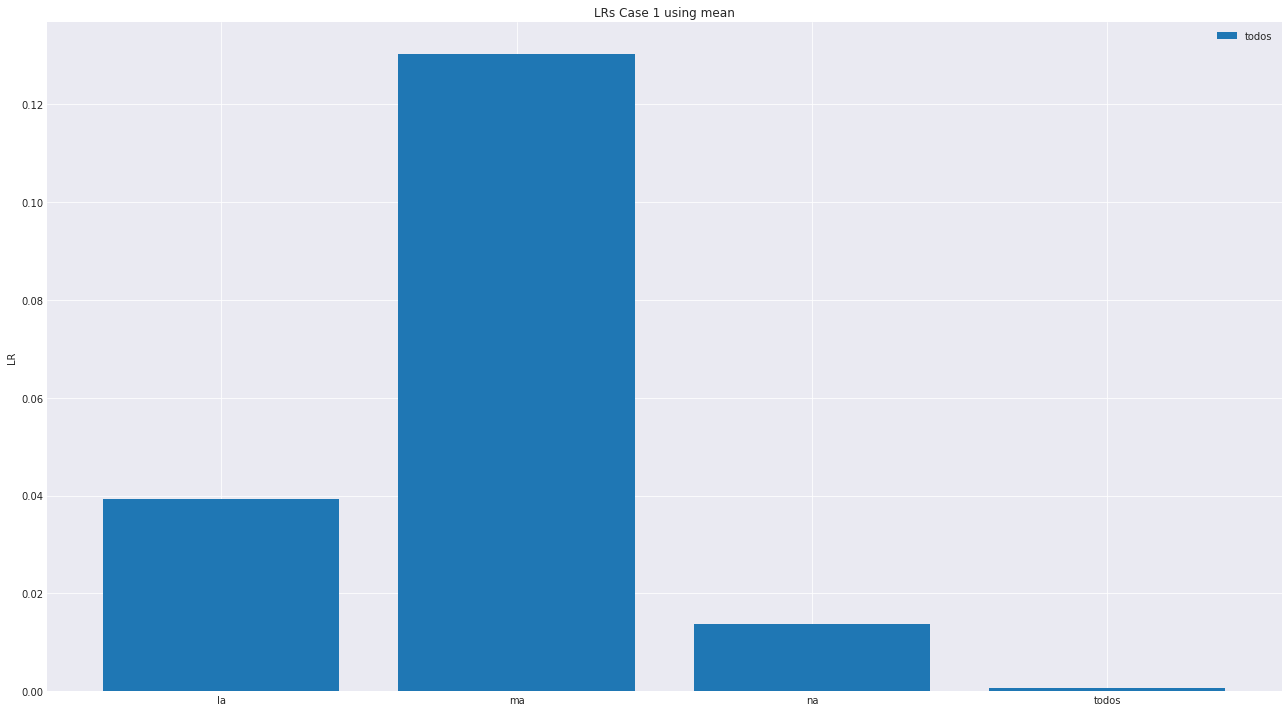

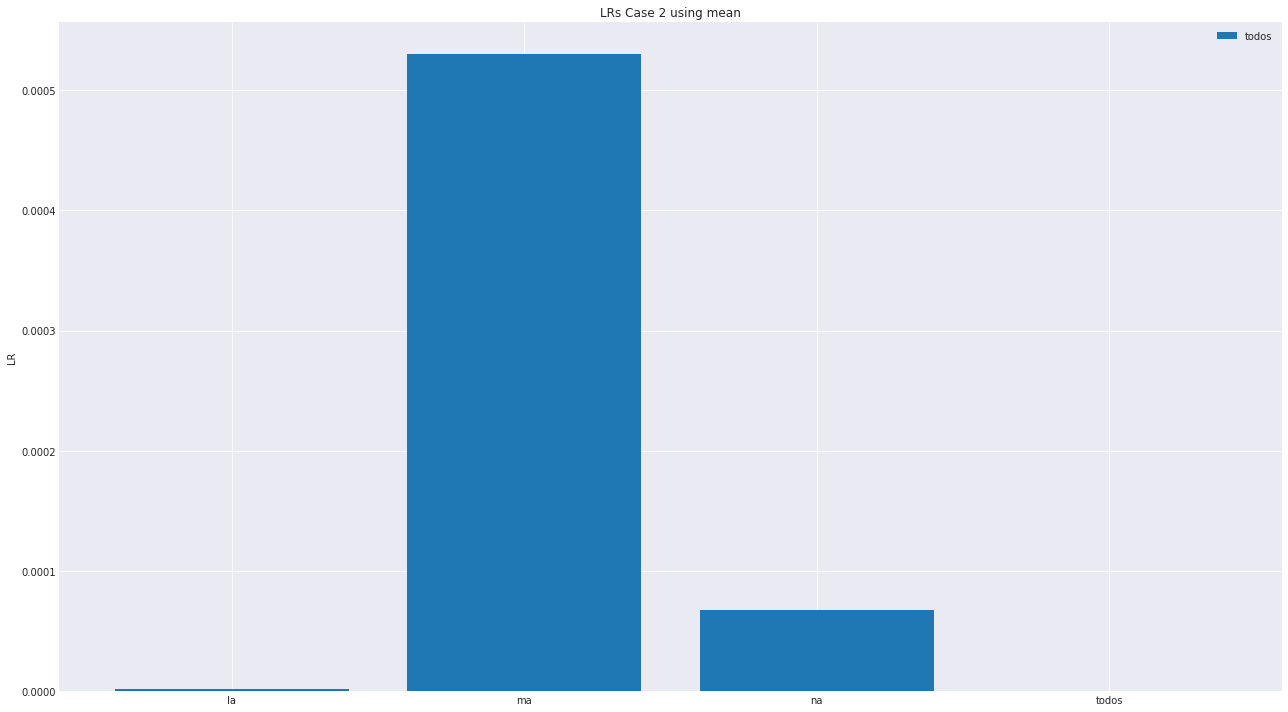

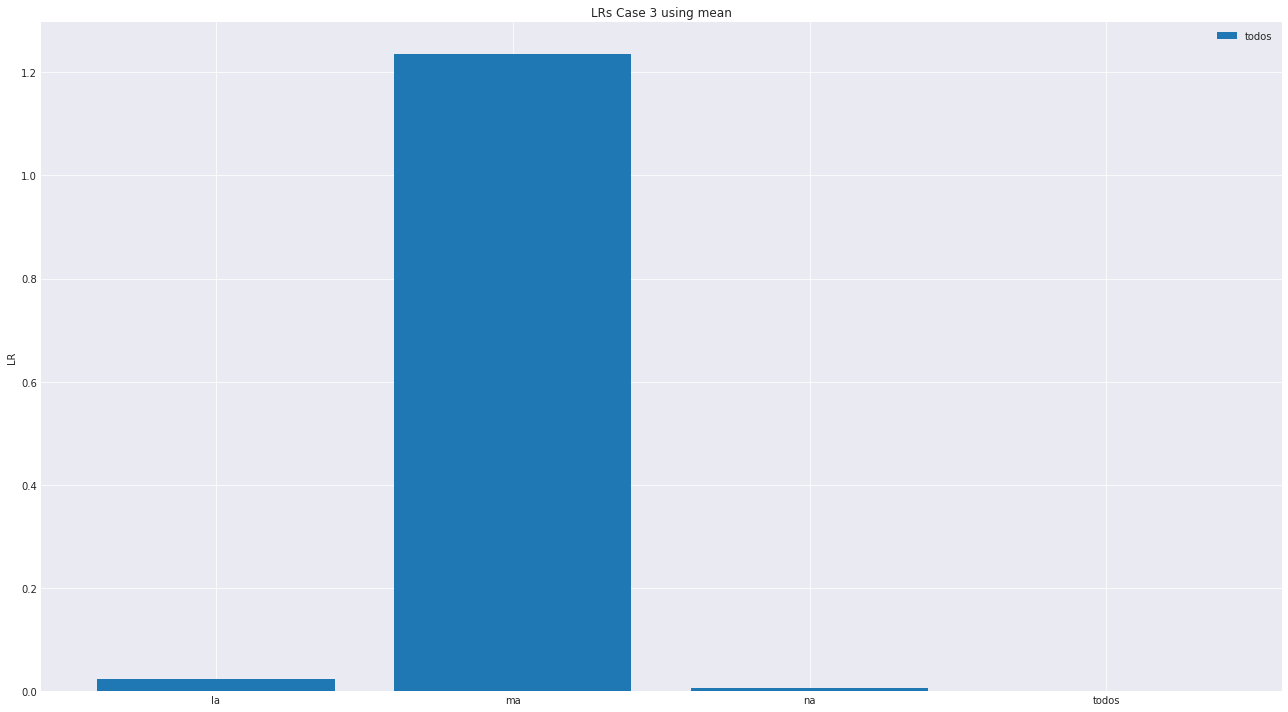

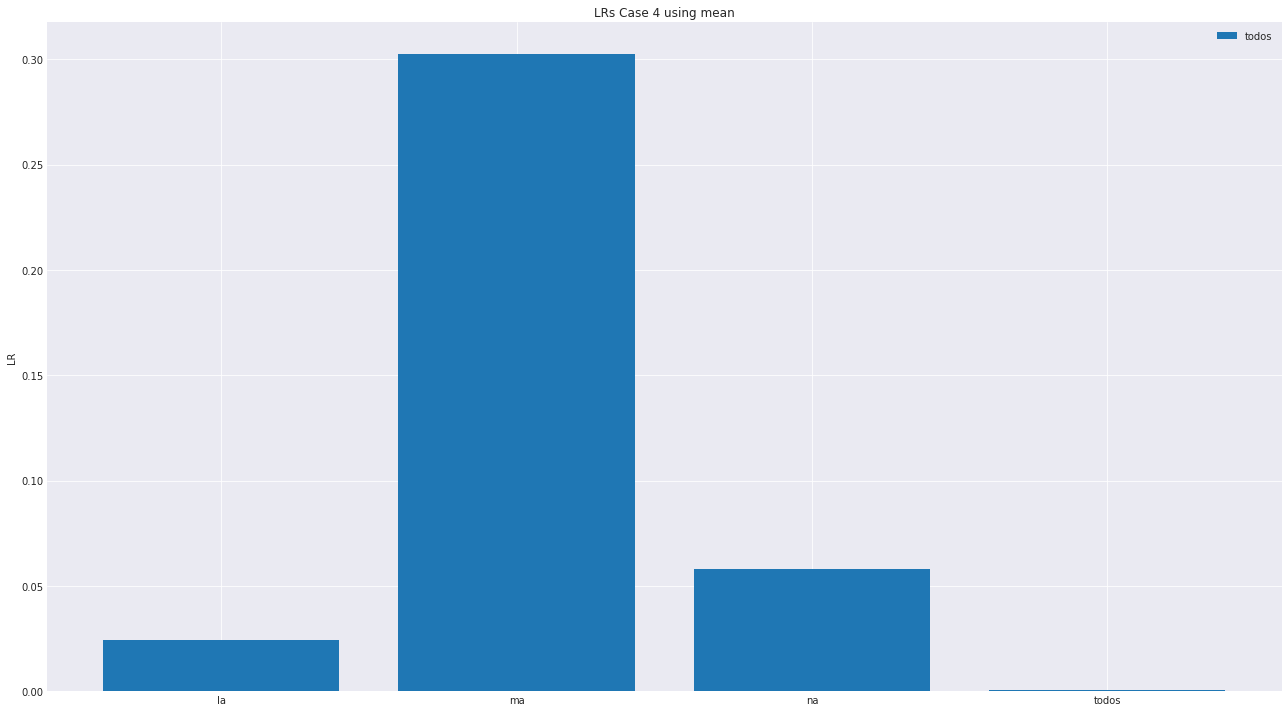

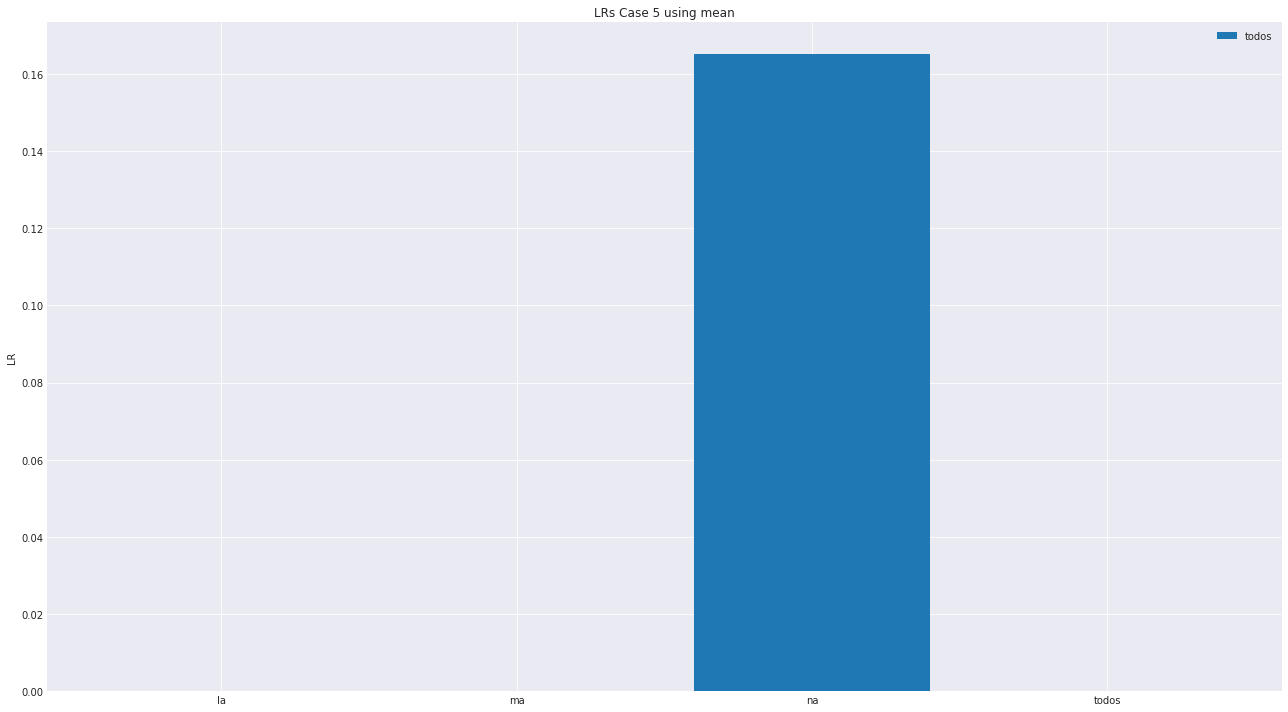

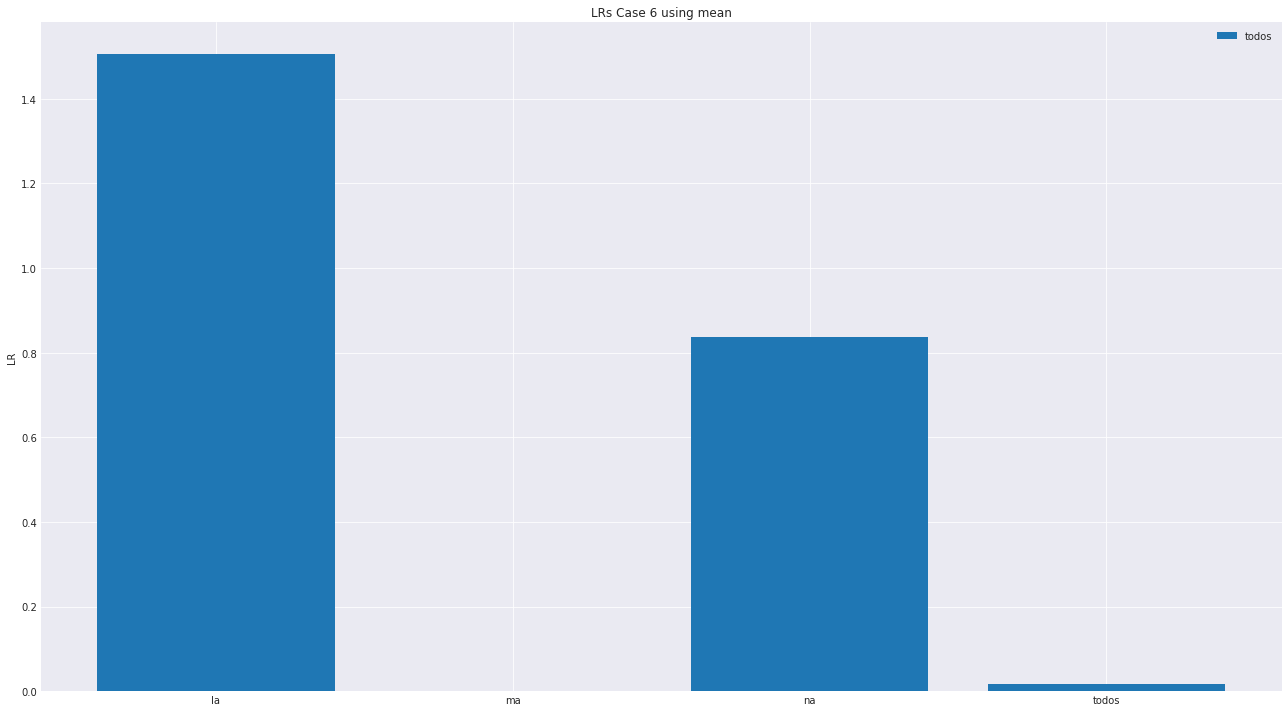

In [27]:
for ii,case in enumerate(cases):
    res_plot2(data,case=ii+1,extra={'gender':'F'},measures=['F0','F1','F2','F3'],cvs=['la','ma','na','todos'],metric="mean")

In [28]:
for ii,case in enumerate(cases):
    res_table2(data,case=ii+1,extra={'gender':'F'},measures=['F0','F1','F2','F3'],cvs=['la','ma','na','todos'],metric="mean")